In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
solar = pd.read_csv('ca_data_version_16_90_percentile.csv')
solar.drop(columns='Unnamed: 0', index=1, inplace = True)

In [3]:
solar.head()

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
0,34.082452,-117.396048,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,354.0,NaN,6.137753,"[126643.6284333316, 123642.4656084192, 146079....","[160.3371500625433, 157.9419747969732, 190.017...","[5.172166131049785, 5.640784814177614, 6.12959...","[132621.8932622115, 129576.8218587892, 153178....",1.696741e+06,4.9767
2,39.948686,-122.357736,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,139.0,NaN,5.701319,"[81871.68545656932, 90825.3059124629, 139086.2...","[100.9587614211884, 113.1211746079644, 177.813...","[3.256734239393176, 4.040041950284444, 5.73593...","[86019.00030301968, 95337.82386751169, 145682....",1.566192e+06,83.4367
3,37.934613,-121.645842,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,10.0,NaN,5.892671,"[93225.92555313384, 117872.5185756382, 133564....","[113.2858897184085, 147.74228808641, 170.25043...","[3.654383539303501, 5.276510288800359, 5.49194...","[97835.782674236, 123415.2943375236, 139980.07...",1.657431e+06,17.8811
4,37.973721,-121.991002,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,54.0,NaN,5.897817,"[96173.72130512354, 120312.542412835, 141419.0...","[116.6067532589445, 150.3203686240996, 179.493...","[3.761508169643369, 5.368584593717842, 5.79011...","[100873.0371669258, 125951.7057612103, 148151....",1.666310e+06,1.1831
5,35.197037,-114.958349,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,759.0,min_distance,6.577350,"[144686.0204835207, 142229.2249348187, 170313....","[176.4281780776011, 176.0505798260508, 216.424...","[5.691231550890357, 6.287520708073243, 6.98144...","[151422.9156741159, 149406.6120426671, 178628....",1.844776e+06,347.0787


In [4]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,4999.000000,4999.000000,3414.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,4999.000000,4999.000000,4999.000000,4999.000000,4.999000e+03,4961.000000
mean,36.666560,-119.211383,0.059461,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.839968,2.876975,493.658532,6.068809,1.691150e+06,122.939536
std,2.597009,2.662422,0.236520,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.366672,6.404832,575.773537,0.548875,1.424719e+05,121.204737
min,32.537677,-124.450274,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.113513,1.194338e+06,0.139700
25%,34.512643,-121.473261,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,27.000000,5.687008,1.596890e+06,28.877000
50%,36.292067,-120.006327,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,252.000000,5.993635,1.669351e+06,74.555700
75%,38.521236,-116.856734,0.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,2.000000,836.500000,6.598095,1.825291e+06,190.150900
max,41.982314,-114.138592,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,46.000000,3941.000000,6.926908,1.966255e+06,607.302400


In [5]:
solar.isnull().sum()

Latitude                 0
Longitude                0
Solar_farm_present    1585
State                    0
panel.area            4796
power                 4845
panels                4796
landscape.area        4796
water                 4796
urban                 4796
Address               4796
land_cover               0
slope                    0
elevation                0
feature_violated      1788
solrad_annual            0
ac_monthly               0
poa_monthly              0
solrad_monthly           0
dc_monthly               0
ac_annual                0
min_distance            38
dtype: int64

In [6]:
solar = solar[solar['Solar_farm_present'].notnull()]

In [7]:
solar.head()

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
5,35.197037,-114.958349,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,759.0,min_distance,6.577350,"[144686.0204835207, 142229.2249348187, 170313....","[176.4281780776011, 176.0505798260508, 216.424...","[5.691231550890357, 6.287520708073243, 6.98144...","[151422.9156741159, 149406.6120426671, 178628....",1.844776e+06,347.0787
9,34.825508,-116.468428,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,585.0,min_distance,6.696241,"[145004.9851933493, 136230.475867886, 173270.3...","[180.7846473831154, 171.8894079253695, 224.043...","[5.831762818810176, 6.138907425906052, 7.22721...","[151716.3325228928, 142928.4084908232, 181548....",1.844267e+06,111.3899
12,35.685889,-120.631931,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,240.0,min_distance,6.092559,"[115882.4922920196, 106917.6433905065, 143121....","[142.9861620180971, 135.500518137895, 182.3429...","[4.612456839293454, 4.839304219210535, 5.88203...","[121397.5972316804, 112064.179278083, 149969.2...",1.706230e+06,113.7575
14,34.434426,-115.411373,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,228.0,min_distance,6.666521,"[138300.6865093883, 140142.1739703623, 169497....","[173.9142267732087, 177.0456553492674, 220.412...","[5.61013634752286, 6.323059119616693, 7.110090...","[144657.0140692265, 146636.4896877146, 177414....",1.832547e+06,226.9011
16,33.202517,-116.101694,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,62.0,min_distance,6.795307,"[147409.886918252, 142066.6025790554, 175713.6...","[186.7181566247427, 180.4150255254315, 230.770...","[6.023166342733635, 6.44339376876541, 7.444209...","[154112.0246994357, 148795.5846104836, 183889....",1.857753e+06,116.7178


In [8]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,3414.000000,3414.000000,3414.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,3414.000000,3414.000000,3414.000000,3414.000000,3.414000e+03,3376.000000
mean,36.755764,-118.988392,0.059461,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.765671,3.956063,651.196544,6.072497,1.697296e+06,163.297557
std,2.749319,2.791358,0.236520,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.423641,7.494063,618.082330,0.611535,1.578832e+05,127.153195
min,32.537677,-124.450274,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.113513,1.194338e+06,0.139700
25%,34.512643,-121.365398,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,78.000000,5.623467,1.587920e+06,56.003950
50%,35.842322,-118.474676,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,541.500000,6.171427,1.717505e+06,131.032450
75%,38.990535,-116.468428,0.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,2.000000,1066.750000,6.619519,1.836583e+06,250.091225
max,41.982314,-114.138592,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,46.000000,3941.000000,6.926908,1.966255e+06,607.302400


In [9]:
solar_existing = solar[solar['Solar_farm_present']==1]
solar_non_existing = solar[solar['Solar_farm_present']==0]

In [10]:
solar_non_existing_sample = solar_non_existing.sample(300, random_state = 42)

In [11]:
solar_non_existing_sample

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
2118,35.783660,-116.943024,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,569.0,min_distance,6.607551,"[135184.1150161139, 139943.4443335053, 163018....","[167.8281201006324, 175.2290310356397, 212.360...","[5.413810325826852, 6.258179679844274, 6.85034...","[141441.0033450323, 146494.3541191164, 170713....",1.820942e+06,202.1568
3905,32.928759,-114.677906,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,247.0,slope,6.630027,"[142449.9478882992, 145158.4332951723, 169825....","[180.3170144026322, 184.7237982642413, 221.711...","[5.816677883955879, 6.597278509437189, 7.15198...","[148999.0628477855, 151696.1311336358, 177651....",1.818707e+06,115.9976
4889,37.641301,-122.249873,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover,5.532554,"[89506.36044998179, 114172.9115067854, 138637....","[108.3750943881391, 140.5815924496083, 172.663...","[3.495970786714164, 5.020771158914583, 5.56980...","[93958.37778795585, 119667.3228217804, 145230....",1.593870e+06,9.7721
4373,36.174742,-121.710559,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover,5.495839,"[102629.3151986853, 106173.5902631124, 143695....","[127.3432206878001, 132.0325038013074, 182.572...","[4.107845828638714, 4.715446564332407, 5.88942...","[107648.5496628581, 111302.1868932284, 150453....",1.569411e+06,71.2245
3170,40.007349,-120.545641,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1843.0,elevation,5.963413,"[113505.4791834, 108606.4069604987, 143303.068...","[140.5622351814505, 136.5036303913959, 184.193...","[4.534265651014532, 4.875129656835568, 5.94172...","[118934.4564898073, 113783.8639831609, 150404....",1.636304e+06,202.6624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,35.509902,-117.741209,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,893.0,elevation,6.772165,"[140155.037816104, 142690.7610603621, 174689.4...","[172.7367636461938, 177.9331387379986, 224.187...","[5.572153666006252, 6.354754954928521, 7.23185...","[147069.9752812751, 150141.2937065304, 183112....",1.896676e+06,128.4981
4438,36.116080,-121.710559,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover,5.264481,"[103682.9009092766, 109905.5905577235, 128368....","[128.4310139816238, 137.6831410647575, 162.049...","[4.142935934891091, 4.917255038027052, 5.22738...","[108732.957413404, 115171.5924430281, 134552.8...",1.502828e+06,76.2163
608,36.663595,-117.654919,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,471.0,min_distance,6.357913,"[121393.8004000156, 132728.1730159485, 165071....","[152.5546436719589, 165.1048259660599, 213.974...","[4.921117537805126, 5.896600927359282, 6.90241...","[127320.9370007656, 139276.714958155, 172763.7...",1.751840e+06,441.2316
4290,40.163782,-124.320839,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover,4.781651,"[80354.84454792064, 82132.51746527478, 112807....","[97.78194591867091, 100.2570567613625, 139.406...","[3.154256319957126, 3.580609170048663, 4.49699...","[84446.8080913913, 86333.30030479735, 118542.9...",1.408669e+06,337.2982


In [12]:
solar = pd.concat([solar_existing, solar_non_existing_sample])

In [13]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,503.000000,503.000000,503.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,501.000000
mean,36.103329,-118.616248,0.403579,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.870775,2.840954,571.107356,6.212098,1.730380e+06,123.834827
std,2.486942,2.524943,0.491103,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.335782,6.211940,538.837805,0.516449,1.341367e+05,122.603335
min,32.615893,-124.407129,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.376587,1.279991e+06,0.139700
25%,34.365987,-120.761367,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,87.000000,5.835805,1.636359e+06,24.287700
50%,35.177482,-118.302095,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,464.000000,6.432494,1.768725e+06,76.750000
75%,37.719517,-116.490000,1.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,2.000000,862.500000,6.641045,1.844857e+06,195.860900
max,41.982314,-114.354317,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,36.000000,3132.000000,6.920728,1.935697e+06,553.429200


In [14]:
solar.to_csv('ca_data_version_17.csv', index = False)

In [15]:
solar.columns

Index(['Latitude', 'Longitude', 'Solar_farm_present', 'State', 'panel.area',
       'power', 'panels', 'landscape.area', 'water', 'urban', 'Address',
       'land_cover', 'slope', 'elevation', 'feature_violated', 'solrad_annual',
       'ac_monthly', 'poa_monthly', 'solrad_monthly', 'dc_monthly',
       'ac_annual', 'min_distance'],
      dtype='object')

In [16]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,503.000000,503.000000,503.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,501.000000
mean,36.103329,-118.616248,0.403579,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.870775,2.840954,571.107356,6.212098,1.730380e+06,123.834827
std,2.486942,2.524943,0.491103,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.335782,6.211940,538.837805,0.516449,1.341367e+05,122.603335
min,32.615893,-124.407129,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.376587,1.279991e+06,0.139700
25%,34.365987,-120.761367,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,87.000000,5.835805,1.636359e+06,24.287700
50%,35.177482,-118.302095,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,464.000000,6.432494,1.768725e+06,76.750000
75%,37.719517,-116.490000,1.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,2.000000,862.500000,6.641045,1.844857e+06,195.860900
max,41.982314,-114.354317,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,36.000000,3132.000000,6.920728,1.935697e+06,553.429200


In [17]:
columns_ML = ['land_cover','slope', 'elevation',  'solrad_annual','ac_annual', 'min_distance']
X = solar[columns_ML]
y = solar['Solar_farm_present']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns = ['slope', 'elevation', 'solrad_annual', 'ac_annual', 'min_distance',
       'land_cover'] )
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns = ['slope', 'elevation', 'solrad_annual', 'ac_annual', 'min_distance',
       'land_cover'] )

In [20]:
X_train.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance,land_cover
count,402.000000,402.000000,402.000000,402.000000,4.020000e+02,402.000000
mean,0.865672,2.669154,572.997512,6.197587,1.726777e+06,125.512649
std,0.341430,5.883532,540.820470,0.526023,1.360159e+05,120.834037
min,0.000000,0.000000,-84.000000,4.376587,1.279991e+06,0.139700
25%,1.000000,0.000000,88.500000,5.835495,1.635891e+06,26.174350
50%,1.000000,1.000000,464.000000,6.345625,1.759331e+06,78.992100
75%,1.000000,2.000000,861.750000,6.637847,1.844775e+06,197.799375
max,1.000000,36.000000,3132.000000,6.920728,1.935697e+06,547.620400


In [21]:
X_test.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance,land_cover
count,101.000000,101.000000,101.000000,101.000000,1.010000e+02,101.000000
mean,0.891089,3.524752,563.584158,6.269853,1.744720e+06,117.189989
std,0.313081,7.369660,533.473809,0.474502,1.260034e+05,128.656776
min,0.000000,0.000000,-70.000000,4.939896,1.419171e+06,2.173700
25%,1.000000,0.000000,84.000000,5.869558,1.642302e+06,21.822100
50%,1.000000,1.000000,471.000000,6.507147,1.805165e+06,68.159800
75%,1.000000,2.000000,863.000000,6.646807,1.844989e+06,183.212300
max,1.000000,36.000000,2629.000000,6.855898,1.918968e+06,553.429200


In [22]:
sd = StandardScaler()

In [23]:
columns_ML_excluding_LC = ['slope', 'elevation',  'solrad_annual','ac_annual', 'min_distance']
X_train_excluding_LC = X_train[columns_ML_excluding_LC ]
X_train_excluding_LC = pd.DataFrame(sd.fit_transform(X_train_excluding_LC), columns = columns_ML_excluding_LC)

X_test_excluding_LC = X_test[columns_ML_excluding_LC ]
X_test_excluding_LC = pd.DataFrame(sd.fit_transform(X_test_excluding_LC), columns = columns_ML_excluding_LC)

In [24]:
X_train_excluding_LC.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance
count,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02
mean,1.590767e-16,3.093159e-17,-8.837596e-17,2.633604e-15,6.539821e-16
std,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00
min,-2.538591e+00,-4.542306e-01,-1.216330e+00,-3.466141e+00,-3.288896e+00
25%,3.939193e-01,-4.542306e-01,-8.969728e-01,-6.892171e-01,-6.690303e-01
50%,3.939193e-01,-2.840529e-01,-2.017922e-01,2.817799e-01,2.396444e-01
75%,3.939193e-01,-1.138751e-01,5.345809e-01,8.380031e-01,8.686161e-01
max,3.939193e-01,5.672167e+00,4.737600e+00,1.376446e+00,1.537912e+00


In [25]:
X_test_excluding_LC.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance
count,1.010000e+02,101.000000,1.010000e+02,1.010000e+02,1.010000e+02
mean,-4.946538e-17,0.000000,5.496154e-17,-5.012492e-16,6.419507e-16
std,1.004988e+00,1.004988,1.004988e+00,1.004988e+00,1.004988e+00
min,-2.860388e+00,-0.480664,-1.193581e+00,-2.816827e+00,-2.596544e+00
25%,3.496029e-01,-0.480664,-9.034672e-01,-8.478179e-01,-8.168745e-01
50%,3.496029e-01,-0.344296,-1.744152e-01,5.025864e-01,4.820995e-01
75%,3.496029e-01,-0.207928,5.640562e-01,7.983838e-01,7.997336e-01
max,3.496029e-01,4.428593,3.890945e+00,1.241236e+00,1.389782e+00


In [26]:
X_train = pd.concat([X_train_excluding_LC, X_train['land_cover']], axis=1)
X_test = pd.concat([X_test_excluding_LC, X_test['land_cover']], axis=1)

In [27]:
X_train.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance,land_cover
count,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,402.000000
mean,1.590767e-16,3.093159e-17,-8.837596e-17,2.633604e-15,6.539821e-16,125.512649
std,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00,120.834037
min,-2.538591e+00,-4.542306e-01,-1.216330e+00,-3.466141e+00,-3.288896e+00,0.139700
25%,3.939193e-01,-4.542306e-01,-8.969728e-01,-6.892171e-01,-6.690303e-01,26.174350
50%,3.939193e-01,-2.840529e-01,-2.017922e-01,2.817799e-01,2.396444e-01,78.992100
75%,3.939193e-01,-1.138751e-01,5.345809e-01,8.380031e-01,8.686161e-01,197.799375
max,3.939193e-01,5.672167e+00,4.737600e+00,1.376446e+00,1.537912e+00,547.620400


In [28]:
X_test.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance,land_cover
count,1.010000e+02,101.000000,1.010000e+02,1.010000e+02,1.010000e+02,101.000000
mean,-4.946538e-17,0.000000,5.496154e-17,-5.012492e-16,6.419507e-16,117.189989
std,1.004988e+00,1.004988,1.004988e+00,1.004988e+00,1.004988e+00,128.656776
min,-2.860388e+00,-0.480664,-1.193581e+00,-2.816827e+00,-2.596544e+00,2.173700
25%,3.496029e-01,-0.480664,-9.034672e-01,-8.478179e-01,-8.168745e-01,21.822100
50%,3.496029e-01,-0.344296,-1.744152e-01,5.025864e-01,4.820995e-01,68.159800
75%,3.496029e-01,-0.207928,5.640562e-01,7.983838e-01,7.997336e-01,183.212300
max,3.496029e-01,4.428593,3.890945e+00,1.241236e+00,1.389782e+00,553.429200


# 1) Logistic Regression:

In [66]:
params = {"C": np.logspace(-1, 1, 100),
          "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

lr = LogisticRegression(max_iter=3000, random_state=104)   
lr_cv = GridSearchCV(lr, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not conv

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=3000, random_state=104),
             n_jobs=-1,
             param_grid={'C': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283,
        0.25353645,  0.26560878,  0.278...
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ]),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [67]:
lr_tuned = LogisticRegression(**lr_cv.best_params_, max_iter=3000, random_state=104)
lr_tuned.fit(X_train, y_train)
y_pred_train_lr = lr_tuned.predict(X_train) 
y_pred_test_lr = lr_tuned.predict(X_test)

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


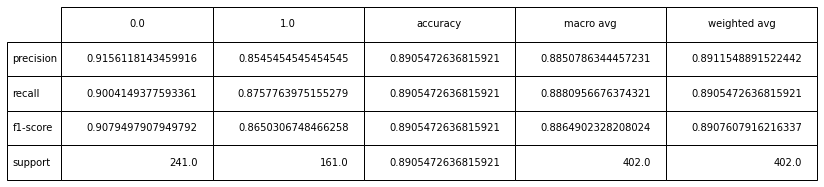

In [68]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_lr, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

In [69]:
def plot_confusion_matrix(y_true, y_pred):
    
    figsize = (10, 10)
    fig, ax = plt.subplots(figsize=figsize)
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)

    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           #xticks=np.arange(n_classes),
           #yticks=np.arange(n_classes),
           #xticklabels=labels,
           #yticklabels=labels
          )

    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)

    threshold = (cm.max() + cm.min()) / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
               horizontalalignment="center",
               color="white" if cm[i, j] > threshold else "black",
               size=15)
        

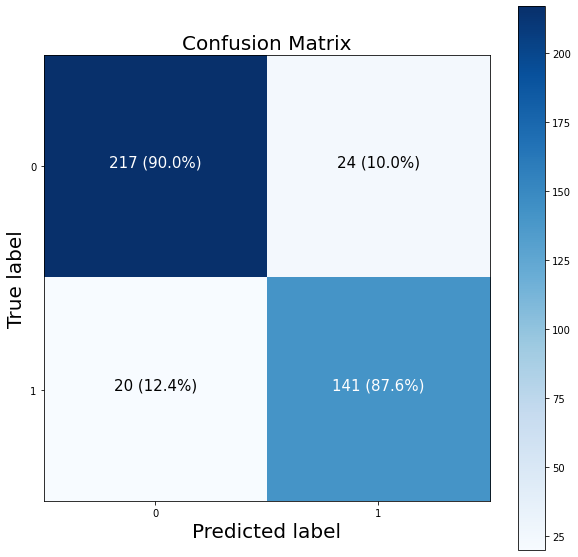

In [70]:
plot_confusion_matrix(y_train, y_pred_train_lr)

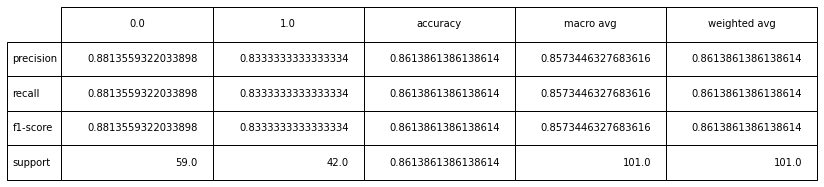

In [71]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_lr, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

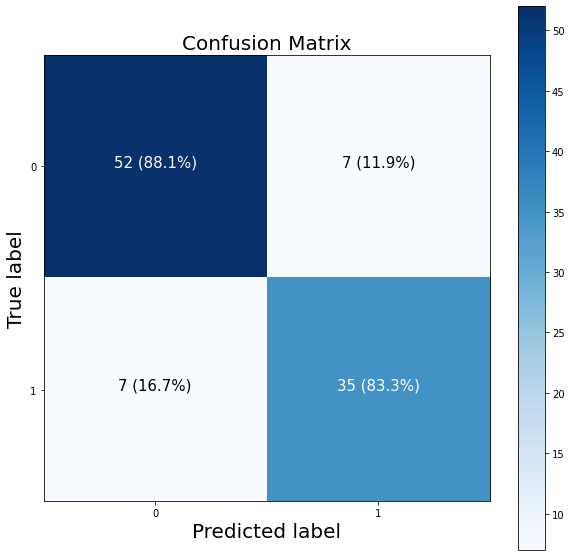

In [72]:
plot_confusion_matrix(y_test, y_pred_test_lr)

# 2) K Nearest-Neighbors Classifier:

In [95]:
knn = KNeighborsClassifier(n_neighbors=8)

kfold = KFold(n_splits = 5, shuffle = True, random_state = 101)

accuracy_average=0

for train_idx, val_idx in kfold.split(X_train):

    X_train_train, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_train, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    knn.fit(X_train_train, y_train_train)

    y_pred = knn.predict(X_val) 
    accuracy_average += accuracy_score(y_val, y_pred)/5

In [74]:
y_pred_train_knn = knn.predict(X_train)

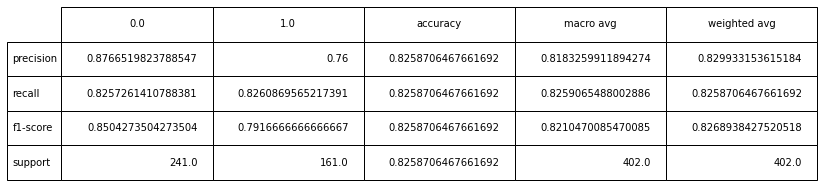

In [75]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_knn, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

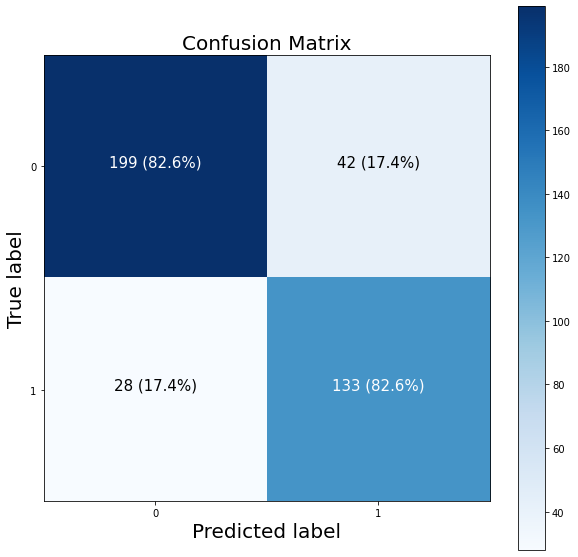

In [76]:
plot_confusion_matrix(y_train, y_pred_train_knn)

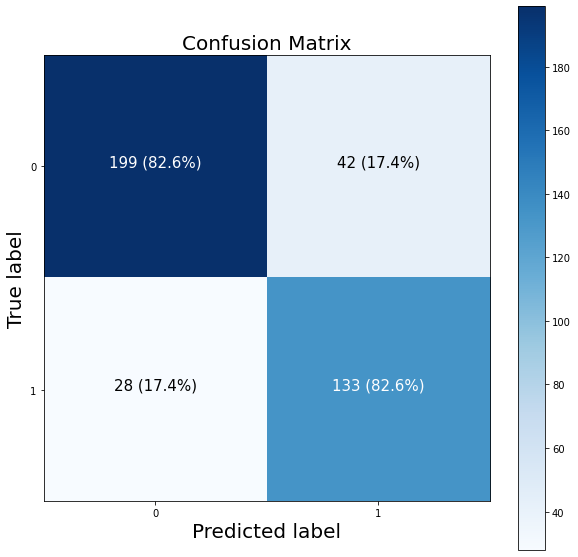

In [77]:
plot_confusion_matrix(y_train, y_pred_train_knn)

In [78]:
y_pred_test_knn = knn.predict(X_test)

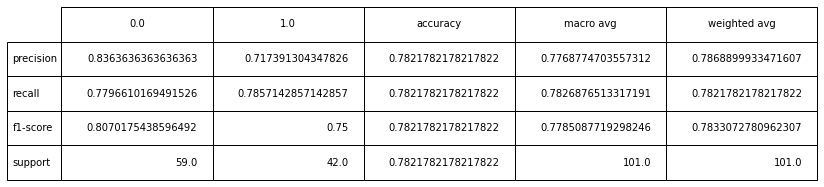

In [79]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_knn, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

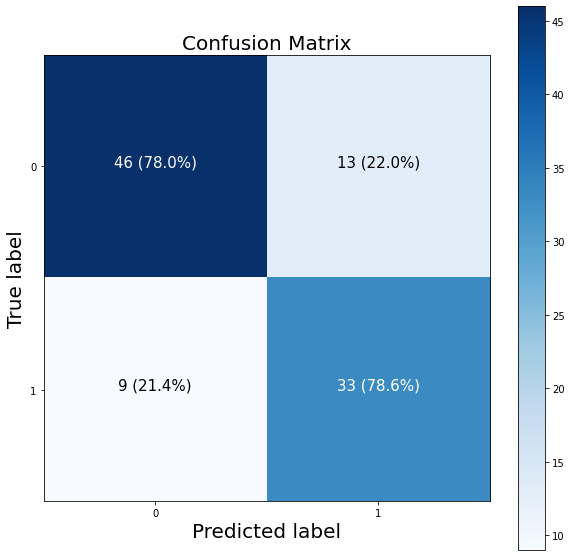

In [80]:
plot_confusion_matrix(y_test, y_pred_test_knn)

# 3) Decision Tree Classifier:

In [81]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree = DecisionTreeClassifier(random_state=406)

tree_cv = GridSearchCV(tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)

tree_cv.fit(X_train, y_train)


Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=406),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=1)

In [82]:
tree_tuned = DecisionTreeClassifier(**tree_cv.best_params_, random_state = 406)
tree_tuned.fit(X_train, y_train)
y_pred_train_tree = tree_tuned.predict(X_train) 
y_pred_test_tree = tree_tuned.predict(X_test)

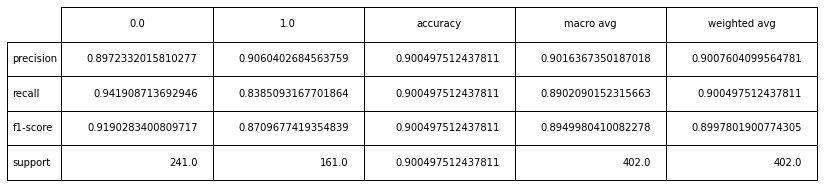

In [83]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_tree, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

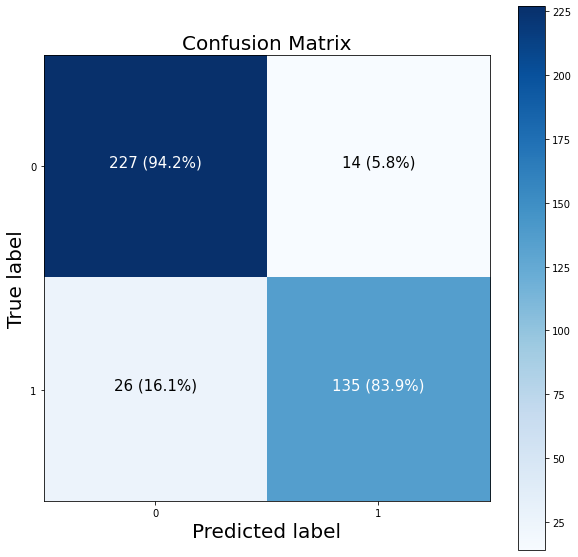

In [84]:
plot_confusion_matrix(y_train, y_pred_train_tree)

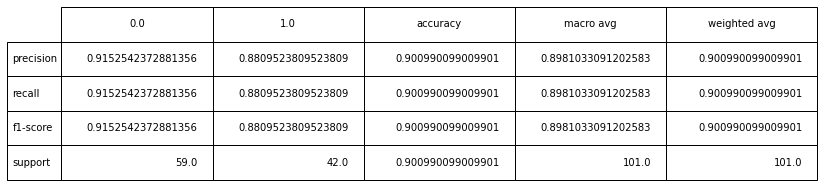

In [85]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_tree, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

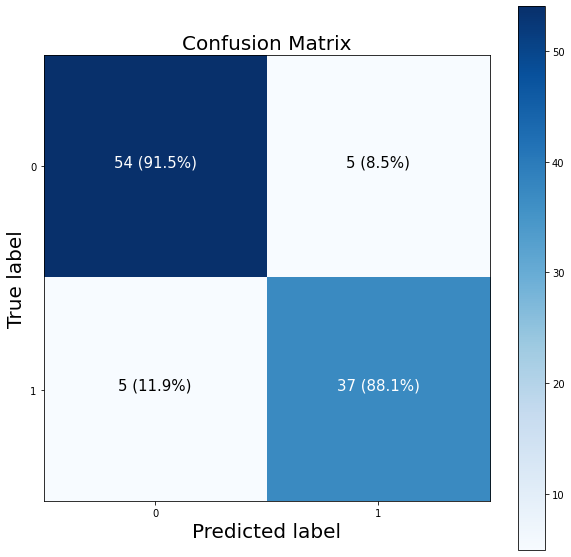

In [86]:
plot_confusion_matrix(y_test, y_pred_test_tree)

# 4) Support Vector Machine:

In [88]:
svm = SVC(kernel='rbf', gamma=0.1, C=1.0, random_state= 113)

params = {"C":(0.1, 1, 10), 
          "gamma":(0.01, 0.1, 1), 
          "kernel":('linear', 'rbf')}               


svm_cv = GridSearchCV(svm, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
svm_cv.fit(X_train, y_train)
    

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(gamma=0.1, random_state=113), n_jobs=-1,
             param_grid={'C': (0.1, 1, 10), 'gamma': (0.01, 0.1, 1),
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy', verbose=1)

In [89]:
svm_tuned = SVC(**svm_cv.best_params_, random_state=113)
svm_tuned.fit(X_train, y_train)
y_pred_train_svm = svm_tuned.predict(X_train) 
y_pred_test_svm = svm_tuned.predict(X_test)

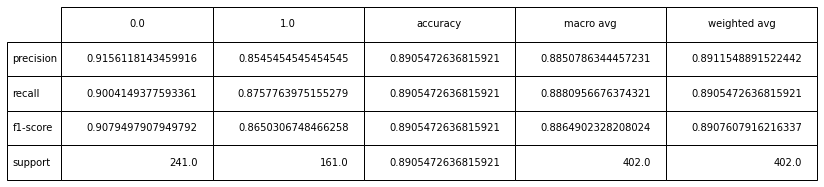

In [90]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_svm, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

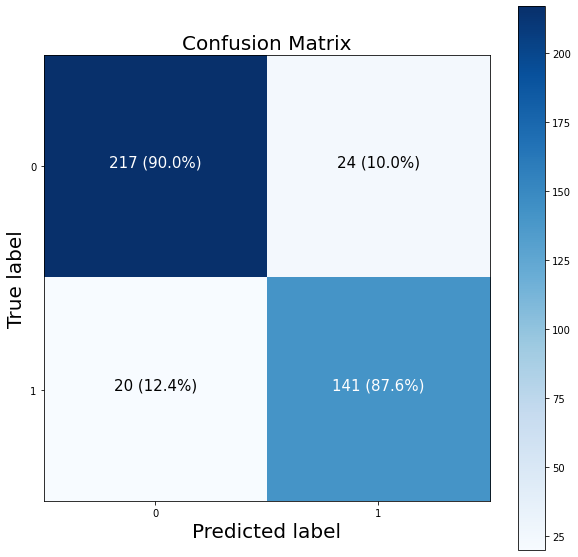

In [91]:
plot_confusion_matrix(y_train, y_pred_train_svm)

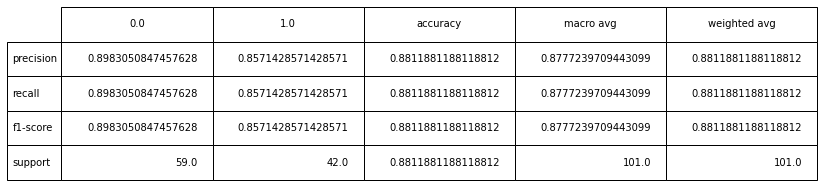

In [92]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_svm, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

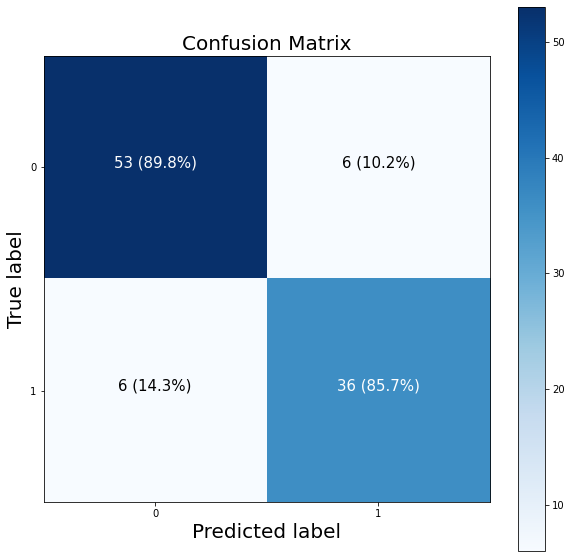

In [93]:
plot_confusion_matrix(y_test, y_pred_test_svm)

# 5) Random Forrest Classifier:

In [98]:
rf = RandomForestClassifier(random_state=42)

n_estimators = [500, 900, 1100, 1500]
max_features = ['log2', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf}

rf_cv = GridSearchCV(rf, params_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 15, None],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [500, 900, 1100, 1500]},
             scoring='accuracy', verbose=1)

In [146]:
rf_tuned = RandomForestClassifier(**rf_cv.best_params_, random_state=42)
rf_tuned.fit(X_train, y_train)
y_pred_train_rf = rf_tuned.predict(X_train) 
y_pred_test_rf = rf_tuned.predict(X_test)

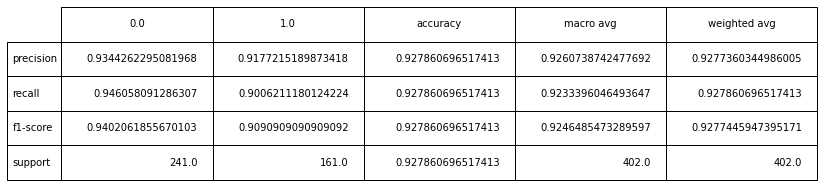

In [147]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_rf, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

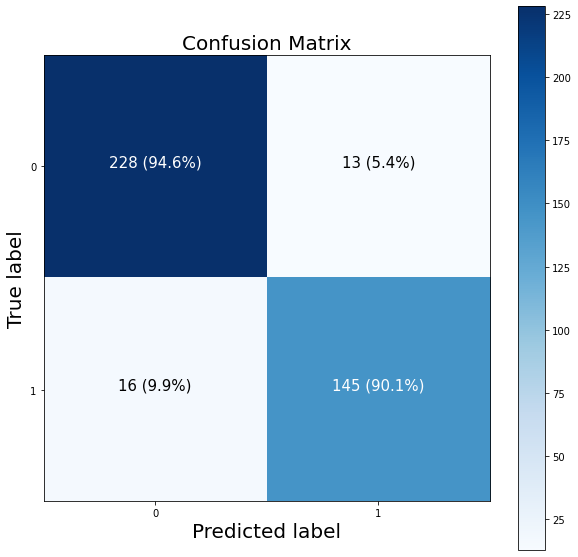

In [148]:
plot_confusion_matrix(y_train, y_pred_train_rf)

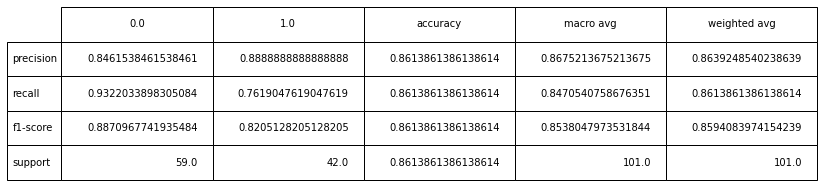

In [149]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_rf, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

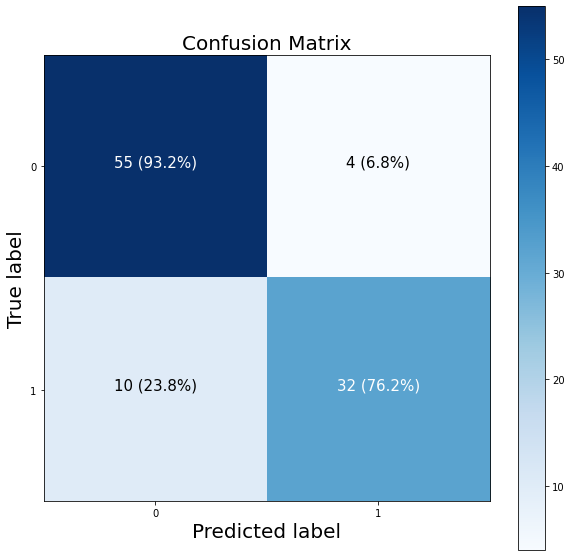

In [150]:
plot_confusion_matrix(y_test, y_pred_test_rf)

# 6) XGBoost Classifier:

In [109]:
param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

xgb = XGBClassifier(use_label_encoder=False, random_state = 101)

xgb_cv = RandomizedSearchCV(xgb, param_grid, cv=5, n_iter=150, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed

  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecate

  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is d

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Chec

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDty

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be r

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDty

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future 

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be rem

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a futu

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if i

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorica

  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:

  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be rem

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a futu

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is dep

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categoric

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=101, ...),
                   n_iter=150, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fbff083f520>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fbfa0348ca0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fbf982417c0>},
                   scoring='accuracy', verbose=1)

In [151]:
xgb_tuned = XGBClassifier(**xgb_cv.best_params_, use_label_encoder=False, random_state = 101)
xgb_tuned.fit(X_train, y_train)
y_pred_train_xgb = xgb_tuned.predict(X_train) 
y_pred_test_xgb = xgb_tuned.predict(X_test)

/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/meysammotaharfar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categ

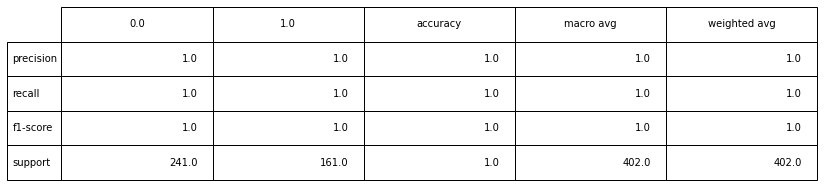

In [152]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_xgb, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

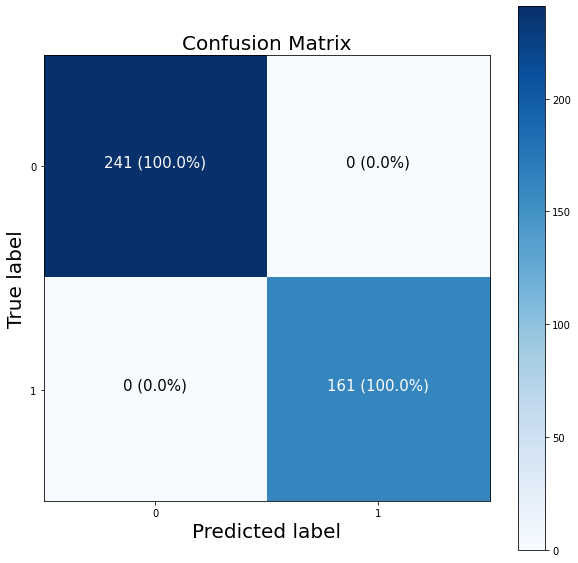

In [153]:
plot_confusion_matrix(y_train, y_pred_train_xgb)

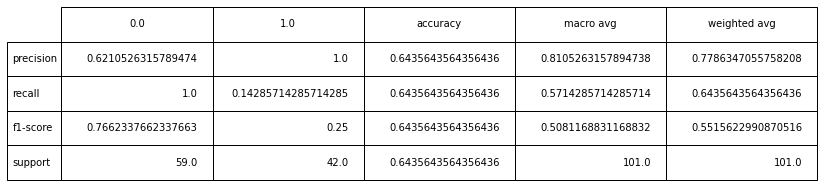

In [154]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_xgb, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

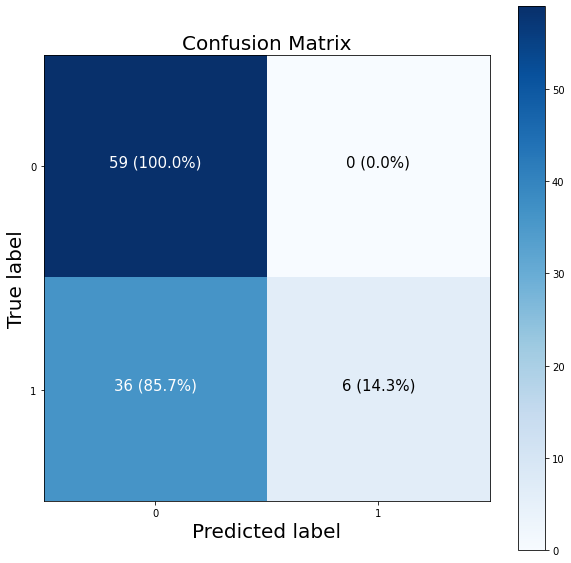

In [155]:
plot_confusion_matrix(y_test, y_pred_test_xgb)